In [55]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run Dublin_data_import.ipynb
import sys
sys.path.append('../') # Change path
from Functions import *
import math
import copy
%store -r random_numbers_matrix

In [56]:
def LR(x):
    return np.exp(-x/70)*0.01+0.00001

In [59]:
alpha = 0

In [60]:
n = 10000000
dim_array = [2,4,8,10,16,20]
Accuracy_dim_alpha3 = [0]*len(dim_array)
l = 0 

for dim in dim_array:
    # Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
    mu = np.zeros(dim) 
    identity_matrix = np.eye(dim) 
    cov_matrix = identity_matrix
    num_samples = 410 

    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

    True_posetiv = np.zeros(len(dim_array))
    True_negativ = np.zeros(len(dim_array))
    False_posetiv = np.zeros(len(dim_array))
    False_negativ = np.zeros(len(dim_array))
    
    Y_updated = np.delete(Y,random_numbers_matrix[0].flatten().astype(int), axis=0)

    prev_grad = 200
    grad = 0
    points_copy = copy.deepcopy(points)
    grad_sum = np.zeros(n) # Define the gradient sum
    k = 0

    while abs(prev_grad - grad) > 0.1: # stopping criteria
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_fast(i,dim,Y_updated,points_copy,alpha)
            grad_sum[k] += np.sum((grad_now)**2)
            points_copy[i] += LR(k+1)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum[k]
        k += 1

    connections = Y[random_numbers_matrix[0].flatten().astype(int), 0]
    point_a = [points_copy[i] for i in Y[random_numbers_matrix[0].flatten().astype(int),1]]
    point_b = [points_copy[i] for i in Y[random_numbers_matrix[0].flatten().astype(int),2]]
    points_a_np = np.array(point_a)
    points_b_np = np.array(point_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
    sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

    True_posetiv[l] = np.sum(connections*sigmoid_value >= 0.5)
    False_posetiv[l] = np.sum(connections*sigmoid_value <= -0.5)
    True_negativ[l] = np.sum((connections*sigmoid_value > -0.5) & (connections*sigmoid_value <= 0))
    False_negativ[l] = np.sum((connections*sigmoid_value > 0) & (connections*sigmoid_value < 0.5))
    
    Accuracy_dim_alpha3[l] = (True_posetiv+True_negativ)/(len(sigmoid_value))

    l += 1

200
-335095.3857780908
183958.1557716272
36813.19241931473
18396.26538838561
9105.013334341405
7495.2674147273065
8946.964586354152
7748.069469202412
5447.789870230612
4369.484446082723
4368.4705866533695
4550.561329671349
4387.287619399205
3808.351702237327
3181.580139304351
2719.0152239569943
2383.902391551899
2111.234751282049
1900.2977833987825
1776.504158722415
1691.5434550759346
1558.2626525541345
1376.8669113398646
1206.6987482644254
1076.0131275653475
977.5972428671703
895.5387221695291
818.8558250170208
743.0727181999555
668.3890694436614
597.1042712338458
530.6057889892145
468.9629681835995
412.8677622629166
365.36844808776186
331.5751191496529
316.0445228382332
319.2196178786726
334.5413521784667
348.5605708642843
347.3813295812315
325.8885250788917
289.61779409132305
248.01007001002563
208.00537552657624
172.6607043510012
142.5460373643673
117.23189342554087
96.05913047755712
78.34918204374571
63.4018851129631
50.55460338350804
39.39842383067207
30.02309630975924
23.0420748

In [42]:
Accuracy_dim_alpha3 = np.sum(Accuracy_dim_alpha3,axis=1)

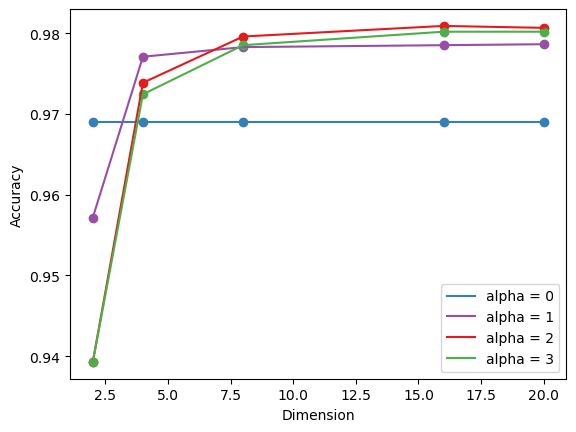

In [46]:
# Define x-axis values
plt.plot(dim_array, Accuracy_dim_alpha0, label='alpha = 0', color = '#377eb8')
plt.plot(dim_array, Accuracy_dim_alpha1, label='alpha = 1', color = '#984ea3')
plt.plot(dim_array, Accuracy_dim_alpha2, label='alpha = 2', color = '#e41a1c')
plt.plot(dim_array, Accuracy_dim_alpha3, label='alpha = 3', color = '#4daf4a')
plt.scatter(dim_array, Accuracy_dim_alpha0, facecolors='#377eb8', edgecolors='#377eb8')
plt.scatter(dim_array, Accuracy_dim_alpha1, facecolors='#984ea3', edgecolors='#984ea3')
plt.scatter(dim_array, Accuracy_dim_alpha2, facecolors='#e41a1c', edgecolors='#e41a1c')
plt.scatter(dim_array, Accuracy_dim_alpha3, facecolors='#4daf4a', edgecolors='#4daf4a')
plt.ylabel('Accuracy')
plt.xlabel('Dimension')
plt.legend()
plt.show()